Author: Sean Tulin
<br>
Date: Mar. 11, 2022
<br>
PHYS 2030 W22

# <font color=#46769B>Lesson 11: Leapfrog method</font>

## <font color=#46769B>Introduction</font>

Here we present another method for solving __initial value problems__ (IVPs) numerically, known as the __leapfrog method__. This algorithm is used for second-order ODEs of the form

$$x''(t) = a(t,x) \, .$$

This ODE often arises in classical dynamics. Namely, Newton's second law for a mass $m$ in one-dimensional motion, with position $x(t)$, is

$$ F = m x''(t) \, ,$$

where $F$ is the force acting on mass $m$. Here, instead of talking about forces, we will consider $a = F/m$, the force-per-unit-mass, known as the *acceleration function*. In general, the acceleration function can depend on the position $x$ and velocity $x^\prime$ (damping is an example of the latter), as well as the time $t$. Here we assume the acceleration function takes the form $a(t,x)$, i.e., it does *not* depend on velocity. (This assumption amounts to assuming that our system is *conservative*, i.e., that energy and other conserved quantities are not lost over time. In contrast, *dissipative* systems, e.g., with damping, do not conserve energy.)

The leapfrog method, as we derive it below, is a *second-order method*, so the local error accrued per step is $\mathcal{O}(h^3)$ and the total global error will be $\mathcal{O}(h^2)$. 


## <font color=#46769B>Derivation</font>

Our starting point for the algorithm is performing a Taylor expansion to relate the position $x$ evaluated at nearby times, $t$ and $t+h$. We have

$$x(t + h) = x(t) + x'(t) h + \frac{1}{2} x''(t) h^2 + \mathcal{O}(h^3) \, . $$

We work at second-order in $h$, ultimately neglecting $\mathcal{O}(h^3)$ terms. We also define the velocity, $v(t) = x'(t)$.
Therefore we have

$$x(t + h) = x(t) + v(t) h + \frac{1}{2} v'(t) h^2 + \mathcal{O}(h^3) \, . $$

Next, we do another Taylor expansion, this time expanding $v(t)$ around the midpoint $t+\tfrac{h}{2}$:

$$v(t) = v(t+\tfrac{h}{2}) - v'(t+\tfrac{h}{2}) \frac{h}{2} + \mathcal{O}(h^2) $$

It suffices to neglect $\mathcal{O}(h^2)$ terms here since we plug $v(t)$ into Eq. (2), where it is already multiplied by $h$.
Combining these equations, we have

$$x(t + h) = x(t) + v(t+\tfrac{h}{2}) h + \frac{1}{2} \left[ v'(t) - v'(t+\tfrac{h}{2}) \right] h^2 + \mathcal{O}(h^3) \, . $$

Since the term in square brackets vanishes for $h \to 0$, it must be $\mathcal{O}(h)$. Since it multiplies $h^2$, we can lump it in with the other $\mathcal{O}(h^3)$ terms that we will neglect. Thus, we have

$$x(t + h) = x(t) + v(t+\tfrac{h}{2}) h + \mathcal{O}(h^3) \, . \qquad (1)$$

We still need to compute $v(t+\tfrac{h}{2})$. We will go through another song-and-dance to relate $v$ at the midpoint $t+\tfrac{h}{2}$ to $v$ at a previous midpoint, $t-\tfrac{h}{2}$. First, we do a Taylor expansion

$$v(t+\tfrac{h}{2}) = v(t-\tfrac{h}{2}) + v'(t-\tfrac{h}{2}) h + \frac{1}{2} v''(t-\tfrac{h}{2}) h^2 + \mathcal{O}(h^3)$$

Next, we do another Taylor expansion for $v^\prime(t - \tfrac{h}{2})$ around time $t$:

$$ v'(t-\tfrac{h}{2}) = v'(t) - v''(t) \frac{h}{2} + \mathcal{O}(h^2) \, .$$

Combining these equations, we have

$$v(t+\tfrac{h}{2}) = v(t-\tfrac{h}{2}) + v'(t) h + \frac{1}{2} \left[ v''(t-\tfrac{h}{2}) - v''(t) \right] h^2 + \mathcal{O}(h^3) \, .$$

Again, since the term in square brackets is $\mathcal{O}(h)$ and multiplies $h^2$, we can lump that term into the $\mathcal{O}(h^3)$ terms that we will neglect. Thus we have

$$ v(t+\tfrac{h}{2}) = v(t-\tfrac{h}{2}) + a(t,x(t)) h  + \mathcal{O}(h^3) \, . \qquad (2)$$

Eqs. (1) and (2) are the main results. Note that the position $x$ and velocity $v$ are not evaluated at the same steps: $x$ is evaluated at each "full" step, velocities are evaluated every "half" step. In this way, position and velocity *leapfrog* over each other in the algorithm.

## <font color=#46769B>Algorithm</font>

First, we decide on our range for $t$ and the number of steps $N$, and we calculate the step-size $h$:
```py
t = np.linspace(t0,tf,num=num_steps+1)
h = t[1] - t[0]
```
where $t_0$ is the initial time and $t_f$ is the final time.

Next, we need to implement the initial conditions. But before we discuss that, let's describe the main body of the algorithm. The key formulas are as follows: 
- We define $x_i = x(t_i)$ to be the value of $x$ on each (full) step $t_i$.
- We define $v_{i+1/2} = v(t_i + \tfrac{h}{2})$ to be the value of $v$ at each half-step (midpoint between steps).

Given $x_i$ and $v_{i-1/2}$ from the previous iteration, we perform the following:

$$v_{i+1/2} = v_{i-1/2} + h \, a(t_i,x_i)$$

$$x_{i+1} = x_i + h \, v_{i+1/2}$$

We would put this in a `for` loop and iterate over $i$ until we have solved for $x_N$ in the last iteration. However, it is slightly awkward that the solution that we get out has $x$ and $v$ evaluated at different times. It is useful to consider a modified version of the leapfrog algorithm that will yield values of $x$ and $v$ at the *same* times.

Given we have $x_i$ and $v_i$ from the previous iteration, we perform the following:

$$v_{i+1/2} = v_{i} + \frac{h}{2} \, a(t_i,x_i)$$

$$x_{i+1} = x_i + h \, v_{i+1/2}$$

$$v_{i+1} = v_{i+1/2} + \frac{h}{2} \, a(t_{i+1},x_{i+1})$$

This is equivalent to what we had before except we are dividing the $v_{i+1/2} = v_{i-1/2} + h \, a(t_i,x_i)$ step into two $\tfrac{h}{2}$ half-steps in order to obtain $v_i$. This is the leapfrog algorithm we will implement. It is known as a *kick-drift-kick* scheme ("kick" = change in velocity, "drift" = change in position).

Note that this algorithm looks like we need to evaluate the acceleration function *twice* per step, but this is not the case since the second evaluation $a(t_{i+1},x_{i+1})$ for step $i$ is the same first evaluation as in the *next* step $i+1$. 

Now that we have covered everything, let's provide a code to implement this algorithm for the case of a simple harmonic oscillator

$$x''(t) + \omega^2 \, x(t) = 0$$

subject to the initial condition

$$x(0) = 1 , \qquad v(0) = 0 \, .$$

The acceleration function is $a(t,x) = -\omega^2 \, x$.

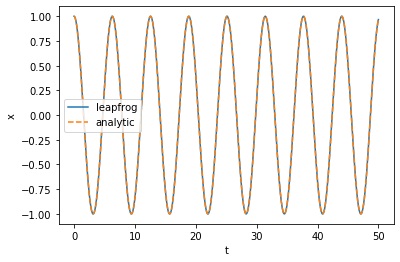

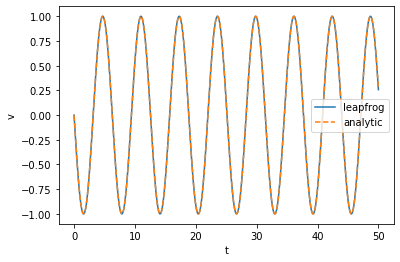

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define time steps
num_steps = 10**3
t0, tf = 0, 50
t = np.linspace(t0,tf,num=num_steps+1)
h = t[1] - t[0]

# acceleration function
omega = 1
def accel(t,x):
    return - omega**2 * x

# Initialize where to save results
x = np.zeros(num_steps+1)
v = np.zeros(num_steps+1)

# Initial condition 
x0, v0 = 1, 0
x[0] = x0
v[0] = v0

# Also need initial acceleration
a = accel(t0,x0)

for i in range(num_steps):
    
    # Kick: calculate v_{i+1/2}
    # Use previous calculation of a
    v_half = v[i] + h/2 * a
    
    # Drift: calculate x_{i+1}
    x[i+1] = x[i] + h*v_half
    
    # Calculate a(t_{i+1},x_{i+1})
    a = accel(t[i+1],x[i+1])
    
    # Kick: calculate v_{i+1}
    v[i+1] = v_half + h/2 * a
    
    
# Make a plot of x vs t
plt.plot(t,x,label='leapfrog')
    
# Analytic plot
plt.plot(t,np.cos(omega*t),'--',label='analytic')

plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.show()

# Make a plot of v vs t
plt.plot(t,v,label='leapfrog')
    
# Analytic plot
plt.plot(t,-omega*np.sin(omega*t),'--',label='analytic')

plt.xlabel('t')
plt.ylabel('v')
plt.legend()
plt.show()


## <font color=#46769B>Comparison with other methods</font>

Compared to Runge-Kutta methods, the leapfrog method has some advantages. The method is automatically invariant under __time-reversible__. That is, taking one step forward and then one step back, one automatically returns to the same original value. 
For example, taking one step forward for $x$ is 

$$x_{i+i} = x_i + h \, v_{i+1/2} \, $$

Then taking a step-backward is simply

$$x_i = x_{i+1} - h \, v_{i+1/2} = \left(x_{i} + h \, v_{i+1/2} \right) - h \, v_{i+1/2} = x_i$$

so we are *exactly* back to where we started. In contrast, the same simple exercise does *not* work for Runge-Kutta methods. Consider Euler's method for a single ODE $y'(t) = f(t,y)$. Our first step is

$$y_1 = y_0 + h \, f(t_0,y_0)\, .$$

Now taking a step backward yields

$$y_0 = y_1 - h \, f(t_1,y_1) = y_0 + h \, \left[ f(t_0,y_0) - f(t_1,y_1) \right]\, .$$

The expression is brackets is $\mathcal{O}(h)$, so we are back to where we started *but with an error* of $\mathcal{O}(h^2)$.

It turns out that having an algorithm that is time-reversible is advantageous for conservative systems. For Runge-Kutta methods, the energy and other conserved quantities accrue an error that grows as a function of time $t$. For time-reversible methods, conserved quantities like energy are approximately conserved by the algorithm in the sense that their errors do not grow in time $t$. Further discussion can be found [here](https://www.physics.drexel.edu/~valliere/PHYS305/Diff_Eq_Integrators/time_reversal/).

Let's consider the simple harmonic oscillator to illustrate this. The total energy-per-unit-mass is

$$E = \frac{1}{2} \, v(t)^2 + \frac{1}{2} \omega^2 x(t)^2 \, .$$

We will call $E$ the *energy* even though we should multiply by the mass $m$ of the simple harmonic oscillator to get the actual total (kinetic plus potential) energy. In any case, whether or not we multiply by $m$ does not change whether $E$ is conserved.

The following code uses both the midpoint method (RK2) and the leapfrog method to solve this system numerically. Both methods are second order methods, and we use the same step-size $h$ and number steps $N$.


In [2]:
# Define time steps
num_steps = 10**4
t0, tf = 0, 1000
t = np.linspace(t0,tf,num=num_steps+1)
h = t[1] - t[0]

# Define frequency
omega = 1

# Initial conditions
x0, v0 = 1, 0

## Leapfrog method (same as above)

# acceleration function
def accel(t,x):
    return - omega**2 * x

# Initialize
x = np.zeros(num_steps+1)
v = np.zeros(num_steps+1)
x[0] = x0
v[0] = v0
a = accel(t0,x0)

for i in range(num_steps):
    v_half = v[i] + h/2 * a
    x[i+1] = x[i] + h*v_half
    a = accel(t[i+1],x[i+1])
    v[i+1] = v_half + h/2 * a

## Midpoint method
    
# Define function f(t,y)
def f(t,y):
    y1, y2 = y
    return np.array([y2,-omega**2*y1])

# Initialize
y = np.zeros((num_steps+1,2))
y[0] = [x0,v0]

# Iterate
for i in range(num_steps):
    ti = t[i]
    yi = y[i]
    k1 = f(ti,yi)
    k2 = f(ti+0.5*h,yi+0.5*h*k1)
    y[i+1] = yi + h*k2
    
# Save results for x,v for midpoint method
x_mid = y[:,0]
v_mid = y[:,1]

Next, let's analyze the results. Note that we are solving over *many* periods. Instead of showing the full range of $t$, let's show the beginning and end of the $t$ intervals.

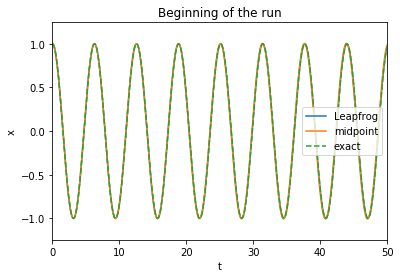

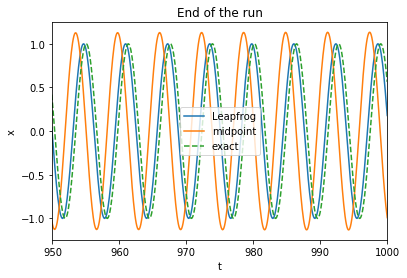

In [3]:
plt.plot(t,x,label='Leapfrog')
plt.plot(t,x_mid,label='midpoint')
plt.plot(t,np.cos(omega*t),'--',label='exact')

plt.legend()
plt.xlim([0,50])
plt.xlabel('t')
plt.ylabel('x')
plt.title('Beginning of the run')
plt.show()

plt.plot(t,x,label='Leapfrog')
plt.plot(t,x_mid,label='midpoint')
plt.plot(t,np.cos(omega*t),'--',label='exact')

plt.legend()
plt.xlim([tf-50,tf])
plt.xlabel('t')
plt.ylabel('x')
plt.title('End of the run')
plt.show()

By the end of the run, the midpoint method solution has grown in *amplitude*: the oscillator is swinging back-and-forth more vigorously, i.e., the system is gaining energy. In contrast, the leapfrog method has not visibly increased in amplitude. Now let's plot the energy.

Note the exact value for the energy is $E_{\rm exact} = \tfrac{1}{2} \omega^2$. Let's plot the error in the energy as the difference

$$\Delta E = |E - E_{\rm exact}|$$

for the different methods. The energy error continues to grow in time for the midpoint method, but it remains bounded for the leapfrog method.



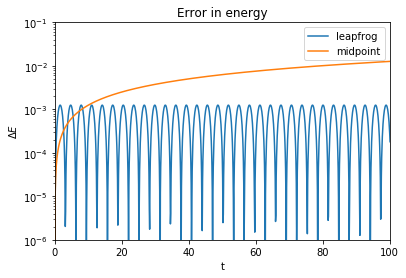

In [4]:
# E for leapfrog
E = 0.5*(v**2 + omega**2*x**2)

# E for midpoint method
E_mid = 0.5*(v_mid**2 + omega**2*x_mid**2)

# E_exact
E_exact = 0.5*omega**2

plt.plot(t,np.abs(E-E_exact),label='leapfrog')
plt.plot(t,np.abs(E_mid-E_exact),label='midpoint')

plt.xlabel('t')
plt.ylabel(r'$\Delta E$')
plt.yscale('log')
plt.xlim([0,100])
plt.ylim([1e-6,1e-1])
plt.title('Error in energy')
plt.legend()
plt.show()


## <font color=#46769B>Systems of coupled ODEs and $n$-body methods</font>

The leapfrog method can be easily generalized beyond a single second-order ODE. The canonical example is Newton's second law expressed as a vector equation $\mathbf{F} = m \mathbf{r}''$. 
For example, we consider a single particle with mass $m$ that is free to move in 3D. 
Its position vector is

$$\mathbf{r} = \left( \begin{array}{c} x(t) \\ y(t) \\ z(t) \end{array} \right) \, .$$

Dividing by $m$, Newton's second law is

$$\mathbf{r}''(t) = \mathbf{a}(t,\mathbf{r}) \, . $$

This looks like a single equation, but it is actually *3 coupled ODEs*. The acceleration function is now a *vector* function

$$\mathbf{a}(t,\mathbf{r}) = \left( \begin{array}{c} a_x(t,\mathbf{r}) \\ a_y(t,\mathbf{r}) \\ a_z(t,\mathbf{r}) \end{array} \right) \, .$$

Hopefully the notation makes clear that *each* component of the acceleration function depends in general on *all* components of $\mathbf{r}$. We also define the velocity vector

$$\mathbf{v}(t) = \mathbf{r}'(t) = \left( \begin{array}{c} v_x(t) \\ v_y(t) \\ v_z(t) \end{array} \right) \, .$$

We have assumed that $\mathbf{a}(t,\mathbf r)$ is *not* a function of $\mathbf{v}$. 

We can further generalize to consider $n$ particles, not just one particle. We can write down Newton's second law for each particle, labeled by an index $a=1,2,...,n$:

$$\mathbf{r}_1(t) = \mathbf{a}_1(t,\mathbf{r}_1, ...,\mathbf{r}_n) \, , \qquad
\mathbf{r}_2(t) = \mathbf{a}_2(t,\mathbf{r}_1, ...,\mathbf{r}_n) \, , \qquad
\mathbf{r}_n(t) = \mathbf{a}_n(t,\mathbf{r}_1, ...,\mathbf{r}_n) \, .$$

All $n$ particles are *coupled*, which means that the acceleration function for *each* particle depends on the positions of *all other particles*. One example is a gravitational system: $n$ particles free to move under the influence of their mutual gravitational pull. The gravitational force felt by one particle depends on the positions of all the others (but not their velocities).

We want to put everything together in one single coupled equation. Let's organize all the positions $\mathbf{r}_a(t)$, all the velocities $\mathbf{v}_a(t) = \mathbf{r}^\prime_a(t)$, and all acceleration functions $\mathbf{a}_a(t,\mathbf{r}_1, ... \mathbf{r}_n )$ into big vectors:

$$\mathbf{r}(t) = \left( \begin{array}{c} \mathbf{r}_1(t) \\ \mathbf{r}_2(t) \\ \vdots \\ \mathbf{r}_n(t) \end{array} \right) 
= \left( \begin{array}{c} x_1(t) \\ y_1(t) \\ z_1(t) \\ x_2(t) \\ y_2(t) \\ z_2(t) \\ \vdots \\ x_n(t) \\ y_n(t) \\ z_n(t) \end{array} \right) \, , \qquad 
\mathbf{v}(t) = \left( \begin{array}{c} \mathbf{v}_{1}(t) \\ \mathbf{v}_{2}(t) \\ \vdots \\ \mathbf{v}_n(t) \end{array} \right) 
= \left( \begin{array}{c} v_{1x}(t) \\ v_{1y}(t) \\ v_{1z}(t) \\ v_{2x}(t) \\ v_{2y}(t) \\ v_{2z}(t) \\ \vdots \\ v_{nx}(t) \\ v_{ny}(t) \\ v_{nz}(t) \end{array} \right) \, , \qquad 
\mathbf{a}(t) = \left( \begin{array}{c} \mathbf{a}_1(t) \\ \mathbf{a}_2(t) \\ \vdots \\ \mathbf{a}_n(t) \end{array} \right) 
= \left( \begin{array}{c} a_{1x}(t,\mathbf r) \\ a_{1y}(t,\mathbf r) \\ a_{1z}(t,\mathbf r) \\ a_{2x}(t,\mathbf r) \\ a_{2y}(t,\mathbf r) \\ a_{2z}(t,\mathbf r) \\ \vdots \\ a_{nx}(t,\mathbf r) \\ a_{ny}(t,\mathbf r) \\ a_{nz}(t,\mathbf r) \end{array} \right) $$

Then Newton's second law for all $n$ particles can be written as one single coupled equation 

$$\mathbf{r}''(t) = \mathbf{a}(t,\mathbf r) \, .$$

This simple looking equation is actually $3n$ coupled ODEs. It may seem like we are hiding a lot of complications under some deceptively simple notation. But there is a practical benefit: once written in this way, the leapfrog algorithm is straightforward to write down:

$$\mathbf{v}_{i+1/2} = \mathbf{v}_{i} + \frac{h}{2} \, \mathbf{a}(t_i,\mathbf{r}_i)$$

$$\mathbf{r}_{i+1} = \mathbf{r}_i + h \, \mathbf{v}_{i+1/2}$$

$$\mathbf{v}_{i+1} = \mathbf{v}_{i+1/2} + \frac{h}{2} \, \mathbf{a}(t_{i+1},\mathbf{r}_{i+1}) \, .$$ 

It is the same as the single-ODE case except now all the quantities $\mathbf{r}_i = \mathbf{r}(t_i)$ and $\mathbf{v}_i = \mathbf{v}(t_i)$ are vectors. Fortunately, the magic of `numpy.arrays` makes all the mathematical steps exactly the same. 

The complications that we are indeed hiding are buried in the acceleration function $\mathbf{a}(t,\mathbf r)$. So, some care is needed to make sure your acceleration function coded up properly. We will go over this further in the exercises.
